In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
%load_ext autoreload
%autoreload 2
from flamingchoripan.files import get_roodirs

rootdir = '../save'
kf = '0'
mode = 'fine-tuning'
method = 'spm-mcmc-estw'

cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
roodirs = get_roodirs(rootdir)
model_names = [r.split('/')[-1] for r in roodirs if '~' in r] # patch
model_names

['mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~cell=LSTM~b=100~rsc=0~bypass=0',
 'mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=102~rsc=0~bypass=0',
 'mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=102~rsc=0~bypass=0',
 'mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=100~rsc=0~bypass=0',
 'mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~cell=GRU~b=100~rsc=0~bypass=0',
 'mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=102~rsc=0~bypass=0',
 'mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-

In [3]:
baselines_dict = {
    '0@val':{
        'b-accuracy':65.86,
        'b-f1score':.43,
    },
    '0@test':{
        'b-accuracy':60.38,
        'b-f1score':.45,
    },
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=['100'](n=1#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~cell=LSTM~b=100~rsc=0~bypass=0
ids=['100'](n=1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=102~rsc=0~bypass=0
ids=[](n=0#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=102~rsc=0~bypass=0
ids=['100'](n=1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=100~rsc=0~bypass=0
ids=['100'](n=1#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~cell=GRU~b=100~rsc=0~bypass=0


No handles with labels found to put in legend.


ids=['100'](n=1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=102~rsc=0~bypass=0
ids=['100'](n=1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=100~rsc=0~bypass=0
ids=['100'](n=1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=100~rsc=0~bypass=0
ids=[](n=0#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=g30-g30-g30.r30-r30-r30~dec-emb=g30-g30-g30.r30-r30-r30~b=104~rsc=0~bypass=0


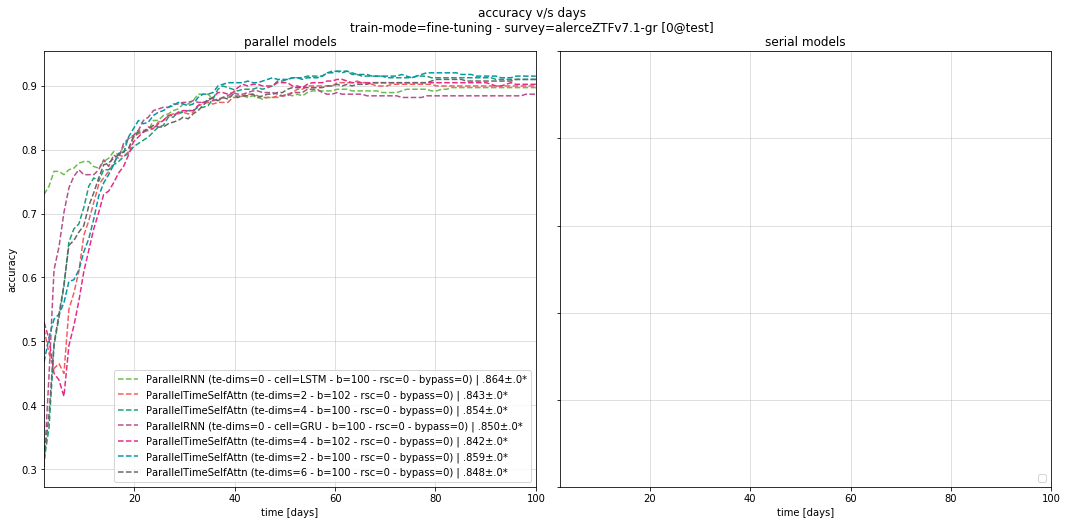

In [7]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_metric

label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'rsc',
    'bypass',
    'b',
]
lcset_name = 'test'
metric_name = 'accuracy' # recall accuracy f1score prauc rocauc
kwargs = {
    'label_keys':label_keys,
    #'baselines_dict':baselines_dict,
    'p':15,
}
plot_metric(rootdir, cfilename, kf, lcset_name, model_names, metric_name, **kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=[](0#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~cell=LSTM~b=100~rsc=0~bypass=0
ids=['100'](1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=g28-g28-g28-g28.r28-r28-r28-r28~dec-emb=g28-g28-g28-g28.r28-r28-r28-r28~b=102~rsc=0~bypass=0


IndexError: list index out of range

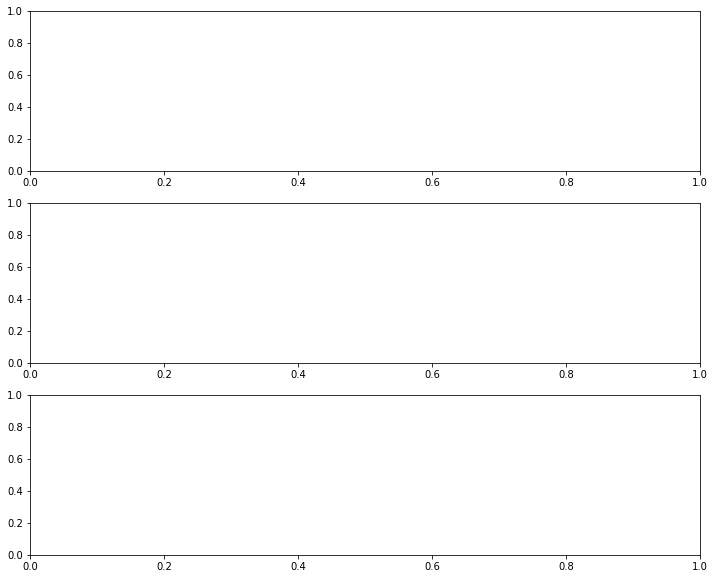

In [5]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_temporal_encoding

label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'rsc',
    'b',
]
lcset_name = f'train.{method}'
kwargs = {
    'label_keys':label_keys,
}
plot_temporal_encoding(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_cm

label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'rsc',
]
lcset_name = 'test'
kwargs = {
    'label_keys':label_keys,
    'export_animation':False, # False True
}
plot_cm(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_parallel_serial_df
from flamingchoripan.latex.latex_tables import LatexTable

metric_names = [
    'b-accuracy',
    'b-f1score',
    'b-gmean',
    'b-xentropy',
    ]
kwargs = {
    'day_to_metric':150,
    #'override_model_name':False, # False True
    'label_keys':label_keys,
    }
info_df = get_parallel_serial_df(rootdir, cfilename, kf, lcset_name, model_names, metric_names, **kwargs)

latex_kwargs = {
    'caption':f'{query_key} {day_to_metric} {set_name}'.replace('_', '\\_'),
    'label':'?',
    #'bold_criteriums':'max',
    #'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'custom_tabular_align':'l|cc|cc|cc',
    'hline_k':1,
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.times import get_times_df

kwargs = {
    #'override_model_name':False, # False True
    'label_keys':label_keys,
    }
info_df = get_times_df(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)
info_df